In [2]:
#Training/testing Decision Tree Model using Scikit-learn and SnapML
#Install snapML
# !pip install snapml

In [3]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline   
# above (%matplotlib) works only in jupyter notebook

#import modules from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score

#other libraries
import time 
import gc,sys

In [4]:
#Analyse Data set (taken from Kaggle)
#Read and visualize the data set (use pandas)

raw_data=pd.read_csv('creditcard.csv')
print("There are " +str(len(raw_data))+ " observations in the data set")
print("There are "+str(len(raw_data.columns))+ " variables in the dataset.")

raw_data.head()  #display first rows 

There are 284807 observations in the data set
There are 31 variables in the dataset.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#In real time, datasets are huge
#Inflating original data set 10 times 

replica=10

big_raw_data=pd.DataFrame(np.repeat(raw_data.values,replica,axis=0), columns=raw_data.columns)

print("There are "+ str(len(big_raw_data))+ " observations in the inflated dataset")
print("There are "+ str(len(big_raw_data.columns))+ " variables in the dataset")

big_raw_data.head() #display the first rows

There are 2848070 observations in the inflated dataset
There are 31 variables in the dataset


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
2,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
3,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
4,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0


In [6]:
#Class variable in the displayed rows above is the target variable
#train the model to use other variables and predic the value of class variable
#Class values :  1(fraud) 0(otherwise)

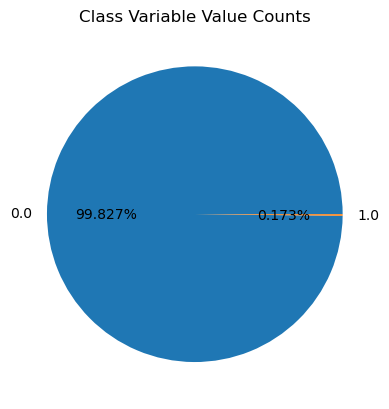

In [7]:
#retreive basic statistics of class variable 

# distinct classes
labels = big_raw_data.Class.unique()

# count
sizes = big_raw_data.Class.value_counts().values

# plotting the values
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Class Variable Value Counts')
plt.show()

In [8]:
#Preprocessing the dataset 

big_raw_data.iloc[:, 1:30] = StandardScaler().fit_transform(big_raw_data.iloc[:, 1:30])
data_matrix = big_raw_data.values

# Exclude the Time variable from the dataset for analysis
X = data_matrix[:, 1:30]

# labels vector
Y = data_matrix[:, 30]

# normalising data
X = normalize(X, norm="l1")

print('X.shape=', X.shape, 'Y.shape=', Y.shape)  #shape of features and labels matrix

X.shape= (2848070, 29) Y.shape= (2848070,)


In [9]:
# using gc (garbage collector) to delete the data sets (not needed anymore and can occupy more space)

del raw_data
del big_raw_data
gc.collect()

0

In [10]:
#Splitting the datasets for traning and testing purposes

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)       
print('X_train.shape=', X_train.shape, 'Y_train.shape=', Y_train.shape)
print('X_test.shape=', X_test.shape, 'Y_test.shape=', Y_test.shape)

X_train.shape= (1993649, 29) Y_train.shape= (1993649,)
X_test.shape= (854421, 29) Y_test.shape= (854421,)


In [11]:
#Building the Decision Tree Classifier (Scikit-learn)

In [12]:
w_train = compute_sample_weight('balanced', Y_train)

from sklearn.tree import DecisionTreeClassifier
sklearn_dt = DecisionTreeClassifier(max_depth=4, random_state=35)

#Training the tree classifier using scikit-learn

t0 = time.time()
sklearn_dt.fit(X_train, Y_train, sample_weight=w_train)
sklearn_time = time.time()-t0
print("Scikit-Learn --> Training time (s):  {0:.5f}".format(sklearn_time))

Scikit-Learn --> Training time (s):  123.36663


In [13]:
#Building the Decision Tree Classifier (snapML)

In [14]:
#use the same w_train from above (scikit-learn)
from snapml import DecisionTreeClassifier

#feature of snapml --> increases computational ease (gpu)
#use_gpu=True
#snapml_dt = DecisionTreeClassifier(max_depth=4, random_state=45, use_gpu=True)
snapml_dt = DecisionTreeClassifier(max_depth=4, random_state=45, n_jobs=4)

# Training the tree classifier using snapMl

t0 = time.time()
snapml_dt.fit(X_train, Y_train, sample_weight=w_train)
snapml_time = time.time()-t0
print("Snap ML--> Training time (s):  {0:.5f}".format(snapml_time))

Snap ML--> Training time (s):  7.52148


In [15]:
#Comparing Scikit-learn and SnapML training speeds

training_speed = sklearn_time/snapml_time
print('Decision Tree Classifier --> Snap ML vs. Scikit-Learn speed : {0:.2f}x '.format(training_speed))

Decision Tree Classifier --> Snap ML vs. Scikit-Learn speed : 16.40x 


In [16]:
# Computing probabilties of the test samples

sklearn_pred = sklearn_dt.predict_proba(X_test)[:,1]
snapml_pred = snapml_dt.predict_proba(X_test)[:,1]

In [18]:
# Calculating the ROC-AUC score of the predictions of both classifiers

sklearn_roc_auc = roc_auc_score(Y_test, sklearn_pred)
print('Scikit-Learn --> ROC-AUC score : {0:.3f}'.format(sklearn_roc_auc))

snapml_roc_auc = roc_auc_score(Y_test, snapml_pred)   
print('Snap ML --> ROC-AUC score : {0:.3f}'.format(snapml_roc_auc))

Scikit-Learn --> ROC-AUC score : 0.966
Snap ML --> ROC-AUC score : 0.966


In [19]:
#Note: Score is same on the test dataset ; but SnapML is faster than Scikit-learn (for decision tree model)